

> Add blockquote



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv');

In [15]:
# Basic info
print(df.shape)
print(df.columns)


(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
print(df); #to print and show data in files

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [17]:
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)


In [19]:
# Replace empty strings with NaN
df.replace(" ", np.nan, inplace=True)

In [20]:
# Check for nulls
print(df.isnull().sum())

# Fill or drop missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dropna(inplace=True)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [21]:
# Show unique values for all columns with data type 'object' (i.e., text/categorical)
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
# Show count of unique values per column
df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


**📝 Summary:** How to Handle 'No internet service' in Categorical Columns
🧩 Affected Columns:
OnlineSecurity

OnlineBackup

DeviceProtection

TechSupport

StreamingTV

**🎯 Problem:**
These columns have 3 values:

'Yes' – Service is active

'No' – Service not taken (even though internet is present)

'No internet service' – Customer doesn’t have internet

If used as-is with one-hot encoding, "No internet service" is treated like a third valid category, which can mislead the model.

**🧠 Reasoning:**
Simplifies categories

Avoids unnecessary dummy columns

Reduces noise and improves model accuracy

Maintains logical consistency


In [23]:
# Label encode binary columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['Churn'] = le.fit_transform(df['Churn'])  # Target variable

# One-hot encode multi-category columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)


Text(0.5, 1.0, 'Churn Distribution')

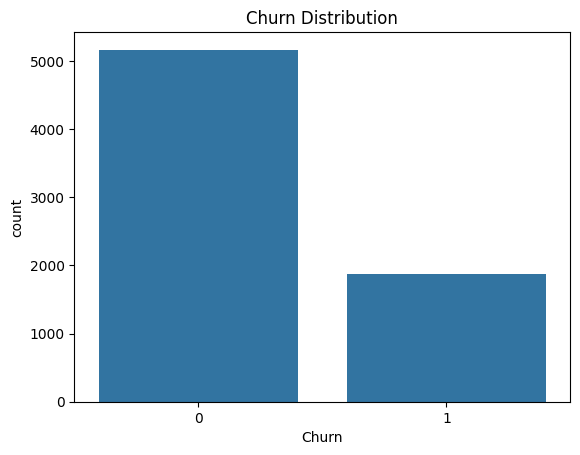

In [27]:
# Plot churn distribution
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")

Churn Counts:
 Churn
0    5163
1    1869
Name: count, dtype: int64

Churn Percentages:
 Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-2780511665.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn',palette='Set2')


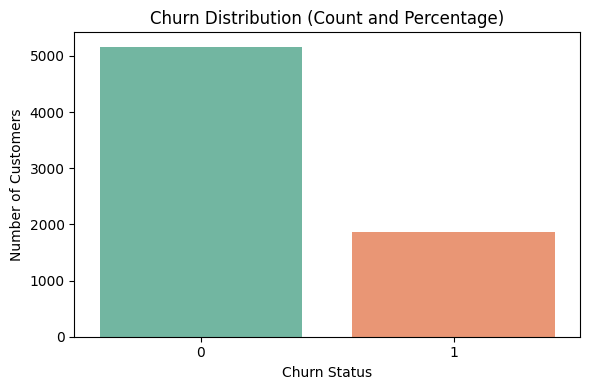

In [35]:
# Calculate churn counts and percentages
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

# Print values
print("Churn Counts:\n", churn_counts)
print("\nChurn Percentages:\n", churn_percent)



# Plot using Seaborn
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn',palette='Set2')


plt.title("Churn Distribution (Count and Percentage)")
plt.ylabel("Number of Customers")
plt.xlabel("Churn Status")
plt.tight_layout()
plt.show()

In [37]:
cols_to_simplify = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_simplify:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [39]:
binary_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [47]:
# Features and target
X = df.drop('Churn', axis=1)  # independent
y = df['Churn']

# Train-test split - USING SKLEARN ML Library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


In [44]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.7867803837953091


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



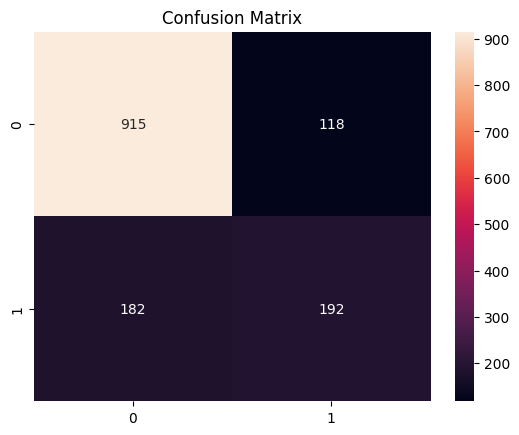

In [45]:
# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [46]:
df.to_csv('cleaned_churn_data.csv', index=False)